In [1]:
!pip install pystan fbprophet

In [2]:
# Ignore warnings 
import warnings
warnings.simplefilter('ignore')

In [3]:
# Import dependencies
import pandas as pd
from fbprophet import Prophet

In [4]:
# Read in data
df = pd.read_csv('dataset.csv')

In [5]:
df.head()

,Time Date,Product,Store,Value
0,1012018,2667437,QLD_CW_ST0203,2926.000
1,2012018,2667437,QLD_CW_ST0203,2687.531
2,3012018,2667437,QLD_CW_ST0203,2793.000
3,4012018,2667437,QLD_CW_ST0203,2394.000
4,5012018,2667437,QLD_CW_ST0203,2660.000


In [6]:
df.describe()

,Time Date,Product,Value
count,1.080000e+03,1080.0,1080.000000
mean,1.567207e+07,2667437.0,4048.117478
std,8.791548e+06,0.0,1439.945783
min,1.012018e+06,2667437.0,2042.813500
25%,8.069518e+06,2667437.0,2632.498599
50%,1.556702e+07,2667437.0,4256.000000
75%,2.308452e+07,2667437.0,5288.248910
max,3.112202e+07,2667437.0,8147.739600


In [7]:
print('Unique values for Product: {}'.format(df['Product'].unique()))
print('Unique values for Store: {}'.format(df['Store'].unique()))


Unique values for Product: [2667437]
Unique values for Store: ['QLD_CW_ST0203']


In [8]:
# x - timedate column
# y - value - target value

df.dtypes

Time Date      int64
Product        int64
Store         object
Value        float64
dtype: object

In [9]:
# Preprocess time date to datetime

df['Year'] = df['Time Date'].apply(lambda x:str(x)[-4:])
df['Month'] = df['Time Date'].apply(lambda x:str(x)[-6:-4])
df['Day'] = df['Time Date'].apply(lambda x:str(x)[:-6])
df['ds'] = pd.DatetimeIndex(df['Year'] + '-' + df['Month'] + '-' + df['Day'])

In [10]:
df.head()

,Time Date,Product,Store,Value,Year,Month,Day,ds
0,1012018,2667437,QLD_CW_ST0203,2926.000,2018,01,1,2018-01-01
1,2012018,2667437,QLD_CW_ST0203,2687.531,2018,01,2,2018-01-02
2,3012018,2667437,QLD_CW_ST0203,2793.000,2018,01,3,2018-01-03
3,4012018,2667437,QLD_CW_ST0203,2394.000,2018,01,4,2018-01-04
4,5012018,2667437,QLD_CW_ST0203,2660.000,2018,01,5,2018-01-05


In [19]:
df.tail()

,y,ds
1075,3167.594500,2020-12-12
1076,3167.594500,2020-12-13
1077,3383.354511,2020-12-14
1078,2714.591329,2020-12-15
1079,2585.035107,2020-12-16


In [11]:
df.dtypes

Time Date             int64
Product               int64
Store                object
Value               float64
Year                 object
Month                object
Day                  object
ds           datetime64[ns]
dtype: object

In [12]:
df.drop(['Time Date', 'Product', 'Store', 'Year', 'Month', 'Day'], axis=1, inplace=True)

In [16]:
df.columns = ['y', 'ds']
df.head()

,y,ds
0,2926.000,2018-01-01
1,2687.531,2018-01-02
2,2793.000,2018-01-03
3,2394.000,2018-01-04
4,2660.000,2018-01-05


2. Train model

In [17]:
# Train model using Prophet
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)

3. Forecast Away - Make Prediction

In [18]:
future = m.make_future_dataframe(periods=100, freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3041.650969,764.293789,4003.419782,3041.650969,3041.650969,-640.901196,-640.901196,-640.901196,468.456246,468.456246,468.456246,16.659618,16.659618,16.659618,-1126.017060,-1126.017060,-1126.017060,0.0,0.0,0.0,2400.749773
1,2018-01-02,3042.411286,734.266351,4004.095878,3042.411286,3042.411286,-651.011594,-651.011594,-651.011594,468.456246,468.456246,468.456246,-11.261861,-11.261861,-11.261861,-1108.205979,-1108.205979,-1108.205979,0.0,0.0,0.0,2391.399692
2,2018-01-03,3043.171603,805.710300,3984.574525,3043.171603,3043.171603,-625.159988,-625.159988,-625.159988,468.456246,468.456246,468.456246,-4.408938,-4.408938,-4.408938,-1089.207297,-1089.207297,-1089.207297,0.0,0.0,0.0,2418.011616
3,2018-01-04,3043.931921,834.732235,4086.531121,3043.931921,3043.931921,-578.115568,-578.115568,-578.115568,468.456246,468.456246,468.456246,22.525682,22.525682,22.525682,-1069.097497,-1069.097497,-1069.097497,0.0,0.0,0.0,2465.816352
4,2018-01-05,3044.692238,994.962442,3921.166848,3044.692238,3044.692238,-614.107141,-614.107141,-614.107141,468.456246,468.456246,468.456246,-34.557511,-34.557511,-34.557511,-1048.005877,-1048.005877,-1048.005877,0.0,0.0,0.0,2430.585097


In [20]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1175,2021-03-22,4241.406743,2117.537170,5184.811746,4237.947781,4244.688408,-513.670394,-513.670394,-513.670394,468.456246,468.456246,468.456246,16.659618,16.659618,16.659618,-998.786258,-998.786258,-998.786258,0.0,0.0,0.0,3727.736349
1176,2021-03-23,4242.490260,2146.953623,5266.360156,4238.988736,4245.817164,-531.142033,-531.142033,-531.142033,468.456246,468.456246,468.456246,-11.261861,-11.261861,-11.261861,-988.336418,-988.336418,-988.336418,0.0,0.0,0.0,3711.348228
1177,2021-03-24,4243.573777,2104.729787,5391.215311,4240.027801,4246.945921,-516.617783,-516.617783,-516.617783,468.456246,468.456246,468.456246,-4.408938,-4.408938,-4.408938,-980.665092,-980.665092,-980.665092,0.0,0.0,0.0,3726.955994
1178,2021-03-25,4244.657294,2116.191627,5317.938297,4241.064266,4248.074677,-485.373705,-485.373705,-485.373705,468.456246,468.456246,468.456246,22.525682,22.525682,22.525682,-976.355633,-976.355633,-976.355633,0.0,0.0,0.0,3759.283589
1179,2021-03-26,4245.740811,2047.704484,5311.925019,4242.101175,4249.203434,-542.007695,-542.007695,-542.007695,468.456246,468.456246,468.456246,-34.557511,-34.557511,-34.557511,-975.906431,-975.906431,-975.906431,0.0,0.0,0.0,3703.733116


In [21]:
# Filter date and predicted forecast column
forecast[['ds', 'yhat']]

,ds,yhat
0,2018-01-01,2400.749773
1,2018-01-02,2391.399692
2,2018-01-03,2418.011616
3,2018-01-04,2465.816352
4,2018-01-05,2430.585097
...,...,...
1175,2021-03-22,3727.736349
1176,2021-03-23,3711.348228
1177,2021-03-24,3726.955994
1178,2021-03-25,3759.283589


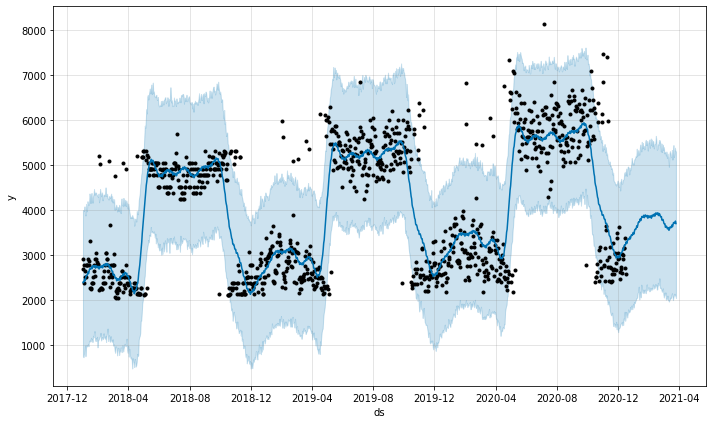

In [22]:
plot1 = m.plot(forecast)

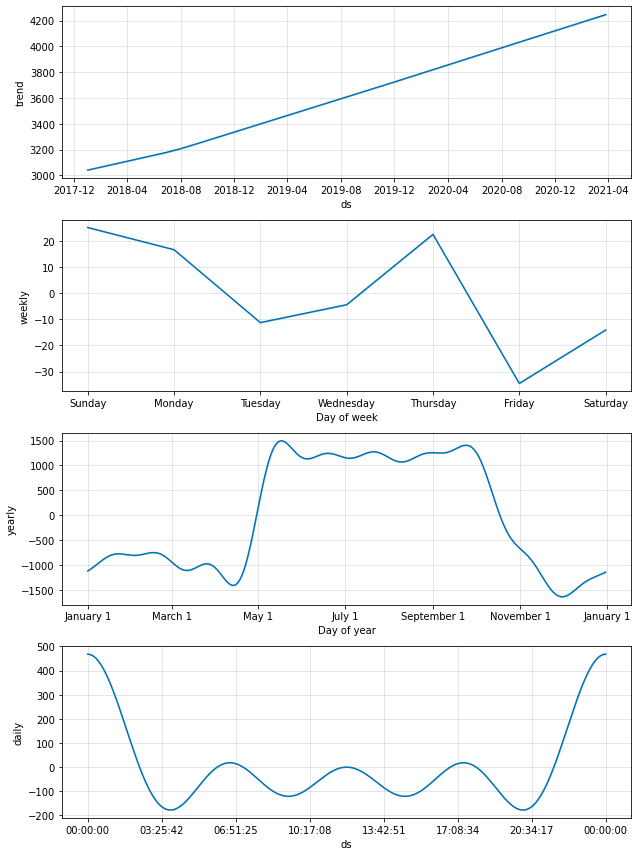

In [23]:
# Decomposing forecast dataset
plot2 = m.plot_components(forecast)